In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import accuracy_score

#temp
import warnings
warnings.filterwarnings(action='ignore')

columns = ["IP source", "IP destiny", "L2 protocol", "Source port", "Destiny port", "Package size"]

X_train = pd.read_csv("Profile.csv", index_col = 0)
X_train["L2 protocol"] = X_train["L2 protocol"].astype("category")

X_test = pd.read_csv("TestSet.csv", index_col = 0)
X_test["L2 protocol"] = X_test["L2 protocol"].astype("category")

In [5]:
mapper = DataFrameMapper([(["IP source", "IP destiny"], preprocessing.StandardScaler()),
                          ("L2 protocol", preprocessing.LabelBinarizer()),
                          (["Source port", "Destiny port", "Package size"], preprocessing.StandardScaler())
                         ])

mapper.fit(X_train)

DataFrameMapper(default=False, df_out=False,
        features=[(['IP source', 'IP destiny'], StandardScaler(copy=True, with_mean=True, with_std=True)), ('L2 protocol', LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)), (['Source port', 'Destiny port', 'Package size'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)

In [6]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope()
clf.fit(mapper.transform(X_train))
y_pred = clf.predict(mapper.transform(X_test))
print(y_pred)

[1 1 1 ..., 1 1 1]


In [7]:
X=pd.DataFrame([X_test.iloc[1]], columns=columns)
y_pred=clf.predict(mapper.transform(X))
bool(y_pred == 1)

True

([<matplotlib.patches.Wedge at 0x7f91e3d67048>,
  <matplotlib.text.Text at 0x7f91e3d70cc0>])

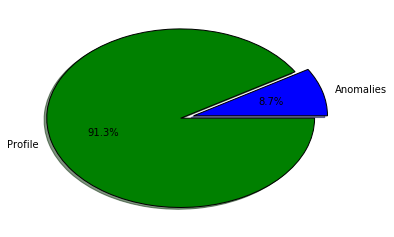

In [41]:
import matplotlib.pyplot as plt
plt.pie([87/1000, 1-87/1000], [0.1,0], ["Anomalies","Profile"], autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x7f91e3fbfe80>,
  <matplotlib.text.Text at 0x7f91e3fcdac8>])

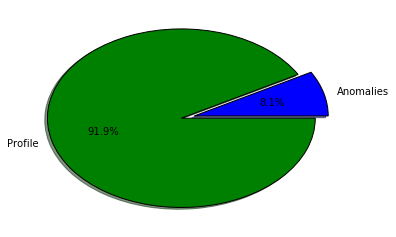

In [32]:
pie([878/10777, 1-878/10777], [0.1,0], ["Anomalies","Profile"], autopct='%1.1f%%', shadow=True)